## 1) 데이터 확인하기

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## 파일 리스트 읽어오기
listOfFiles = glob.glob('lfw1000/*.pgm')  # 지정한 경로 내 확장자가 .pgm인 파일을 모두 읽어서 리스트로 반환
nData = len(listOfFiles)                  # 파일 개수
print("# of files = {}".format(nData))

## 이미지 배열로 저장하기
faces = []
for file in listOfFiles:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    faces.append(img)

faces = np.array(faces)   # list -> array

## 데이터셋 정보 확인하기
print(type(faces))
print(faces.dtype)
print(faces.shape)

# of files = 1071
<class 'numpy.ndarray'>
uint8
(1071, 64, 64)


## 3) Scikit-Learn을 이용한 PCA 적용하기
- 각 요소들의 행렬 크기  
  - 단일 데이터 (64x64): 4096  
  - 학습 데이터셋: 1071×4096  
  - 공분산행렬: 4096×4096  
  - 고유값: k (상위 k개 주성분)
  - 고유벡터: k×4096  

In [2]:
from sklearn.decomposition import PCA

## 2차원 -> 1차원 벡터 형태로 변환
print("Before reshape = {}".format(faces.shape))
faces = faces.reshape((nData, -1))
print("After reshape = {}".format(faces.shape))

print()

## PCA 적용 (정수형 파라미터 입력 -> 사용할 주성분 개수를 지정)
pca = PCA(n_components=10)
pca.fit(faces)                             # 수식 (1)에 해당  𝚺𝐮=𝜆𝐮
eigenVectors = pca.transform(faces)        # 수식 (2)에 해당  𝐲=𝐔𝐱
# eigenVectors = pca.fit_transform(faces)    # 수식 (1) & (2)에 해당
print("shape of eigenVectors  = {}".format(eigenVectors.shape))
print("shape of components = {}".format(pca.components_.shape))
print("explained_variance_ratio = {}".format(pca.explained_variance_ratio_))

Before reshape = (1071, 64, 64)
After reshape = (1071, 4096)

shape of eigenVectors  = (1071, 10)
shape of components = (10, 4096)
explained_variance_ratio = [0.29378922 0.12629319 0.06304694 0.04017165 0.03541217 0.02161253
 0.01987717 0.01758744 0.01693448 0.01495815]


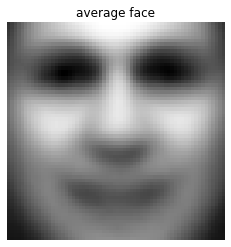

In [3]:
## 평균 얼굴 벡터 시각화해보기
plt.imshow(pca.mean_.reshape((64,64)), cmap='gray')
plt.axis('off')
plt.title('average face')

plt.show()

## 4) PCA 결과 확인하기

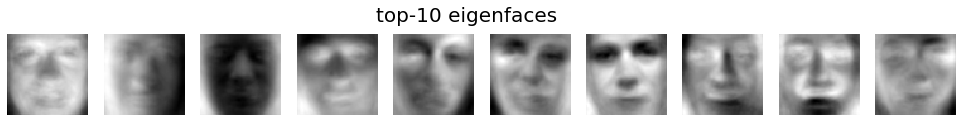

In [10]:
## 2차원 -> 1차원 벡터 형태로 변환
faces = faces.reshape((nData, -1))

## PCA 적용
pca = PCA(n_components=10)
eigenVectors = pca.fit_transform(faces)

## top-10 eigenface 시각화
plt.figure(figsize=(17,17))
plt.suptitle('top-10 eigenfaces', fontsize=20)
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(pca.components_[i].reshape((64,64)), cmap='gray')
    plt.axis('off')

plt.subplots_adjust(top=0.96)
plt.show()

### b. 시각화를 통한 component의 의미 유추하기

In [7]:
meanFace = pca.mean_.reshape((64,64))
components = []
for k in range(5):
    components.append(pca.components_[k].reshape((64,64)))

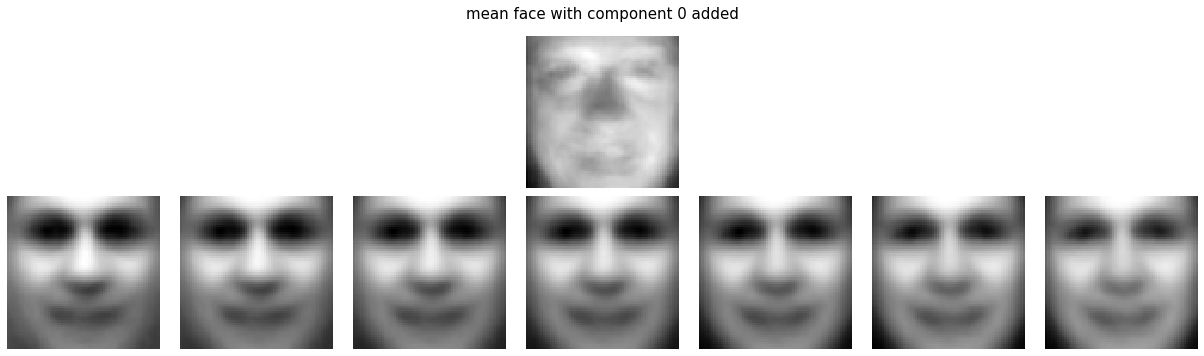

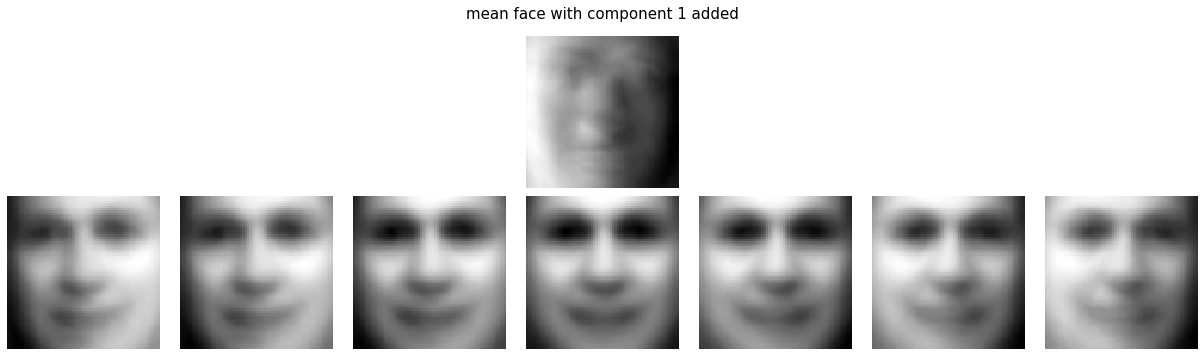

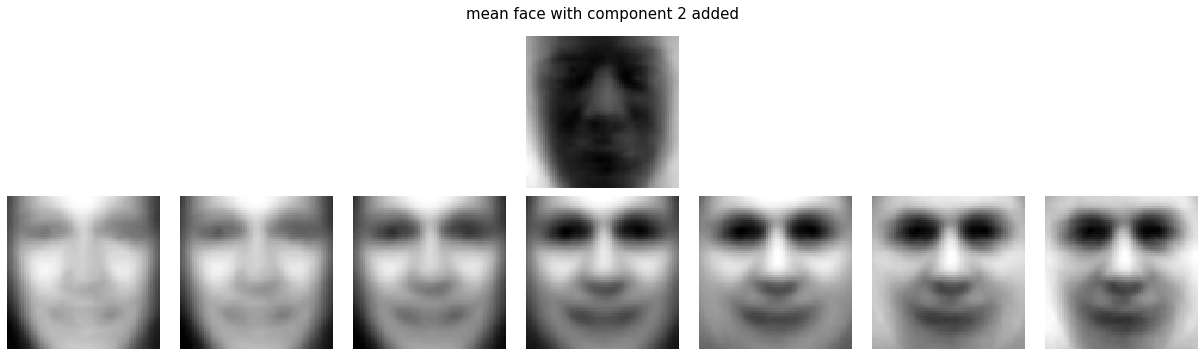

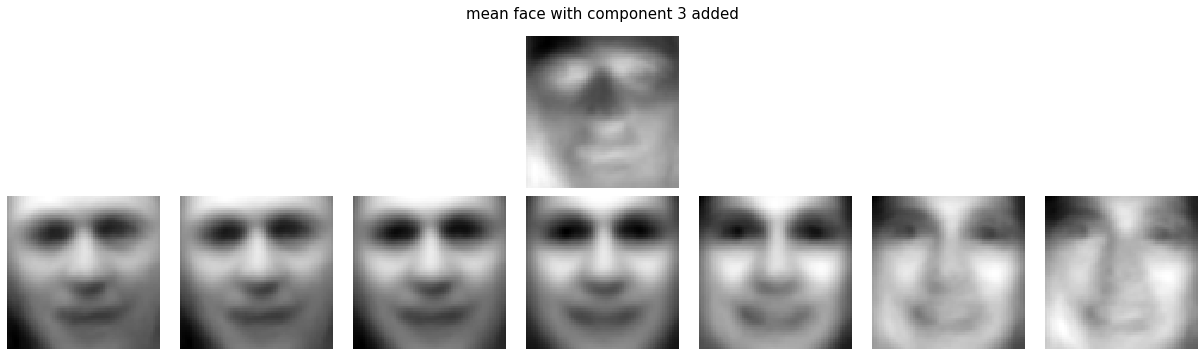

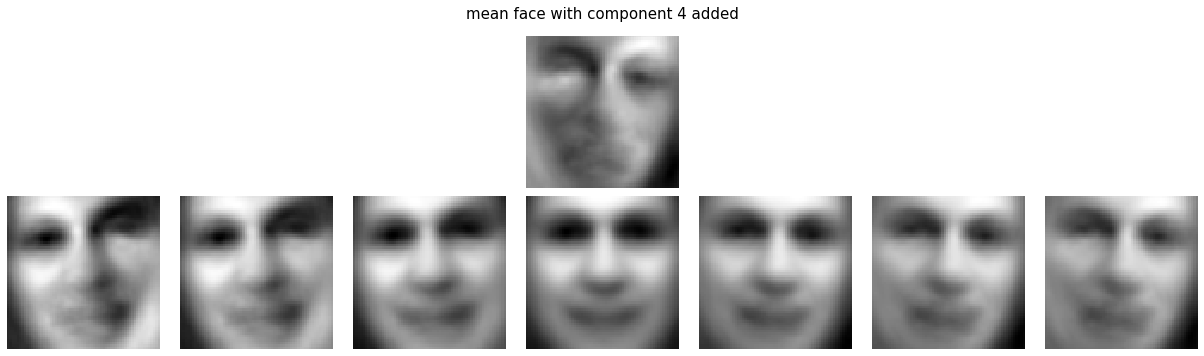

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# k = 0  # 몇 번째 성분을 사용할 것인지

for k in range(5):
    plt.figure(figsize=(17, 5))
    plt.subplot(2, 7, 4)
    plt.imshow(components[k], cmap='gray')
    plt.axis('off')

    for i in range(7):
        plt.subplot(2, 7, 8+i)
        w = (i - 3) * 500   # component의 가중치
        plt.imshow(meanFace + w * components[k], cmap='gray')
        plt.axis('off')

    plt.suptitle("mean face with component {} added".format(k), fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, wspace=0.05, hspace=0.05)

    plt.show()

## 4) eigenface 생성하기

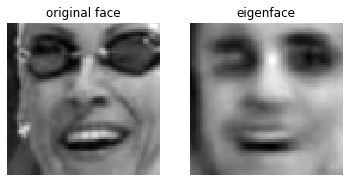

In [9]:
idx = 0     # 테스트하고자 하는 얼굴 영상의 인덱스

## 상위 n개의 eigenvector를 사용하여 eigenface 생성
eigenFaces = pca.inverse_transform(eigenVectors)    # 수식 (3)에 해당

## 결과 시각화
plt.subplot(1,2,1)
plt.imshow(faces[idx].reshape((64,64)), cmap = 'gray')
plt.title('original face')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eigenFaces[idx].reshape((64,64)), cmap = 'gray')
plt.title('eigenface')
plt.axis('off')

plt.show()